In [1]:
import pandas as pd
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/bh/predictions.csv')
t5target = df1['target']
t5pred = df1['prediction']


data2 = torch.load('/fs/ess/PCON0041/xiaohu/MAT/results/final/bh_new/1_1/wmodels/result.pt',map_location=torch.device('cpu'))
with open('/fs/ess/PCON0041/xiaohu/MAT/Data/BH/train_test_idxs.pickle', 'rb') as handle:
        idx_dict = pickle.load(handle)  
train_index = idx_dict['train_idx'][1]
test_index = idx_dict['test_idx'][1]
ourtarget = np.array(data2[test_index][:,1]) 
ourpred = np.array(data2[test_index][:,0]) 

reactions = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/Data/BH/BH_processed.csv').loc[test_index].values
N = reactions.shape[0]
print(reactions[:,5])

/users/PCON0041/xiaohu/anaconda3/envs/t5chem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[4.296191189 28.39231834 62.08187356 ... 3.074612079 22.30541273
 35.72058232]


In [2]:
ourtarget

array([0.04296191, 0.28392318, 0.62081873, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [3]:
ourpred

array([0.06003183, 0.30301327, 0.5518982 , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [4]:
import pandas as pd
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('/fs/ess/PCON0041/xiaohu/MAT/t5chem_results/bh/predictions.csv')
t5target = df1['target'] / 100
t5pred = df1['prediction'] / 100

In [5]:
import scipy
import torch
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(t5target, t5pred)      
MSE = mean_squared_error(t5target, t5pred)
slope, intercept, r_value, p_value, std_err =   scipy.stats.linregress(t5target, t5pred)
print("MAE: {}    RMSE: {}    r2: {}    r:{}".format(MAE, MSE**0.5, r_value**2, r_value))

MAE: 0.03225736521876464    RMSE: 0.0507669838758337    r2: 0.9677177891716922    r:0.9837264808734653


In [6]:
import numpy as np

t5abs_err = np.abs(t5target - t5pred) 
t5mae = np.mean(np.abs(t5target - t5pred))
print("t5 Mean Absolute Error:", t5mae)
 
ourabs_err = np.abs(ourtarget - ourpred) 
ourmae = np.mean(np.abs(ourtarget - ourpred))
print("Our Mean Absolute Error:", ourmae)

#ourabs_err1 = np.abs(t5target - ourpred) 
#ourmae1 = np.mean(np.abs(t5target - ourpred))
#print("Our Mean Absolute Error:", ourmae1)

t5 Mean Absolute Error: 0.03225736521876464
Our Mean Absolute Error: 0.03625162


0.060807783793215976 0.0026559355749241342
0.011013212249773084 0.008913530227210784
0.5092292589871742 -0.0026694757094450003
0.25122300935672065 -0.0038766374055183225
0.03186471980553746 0.008200381388814439
0.8577665689573908 0.0006819527631714353
0.2307732453022281 0.0073163797370680225
0.027391411511647548 0.022277270057078066
0.5310730668577419 0.00282718383435962
0.5520560219515738 0.0029678943008184383


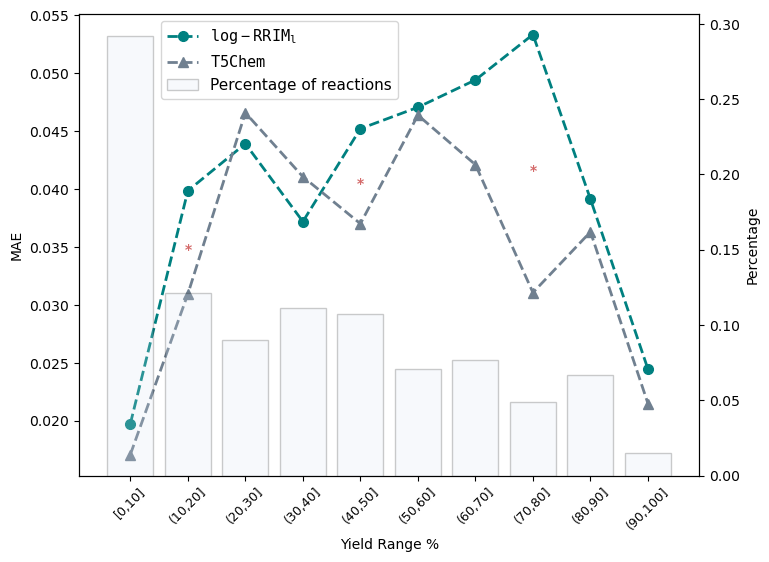

[0.29233361 0.12131424 0.09014322 0.11120472 0.10699242 0.07076664
 0.07666386 0.04886268 0.06655434 0.01516428]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
#plt.rcParams.update({
#    "text.usetex": True,
    #"font.family": 'Times New Roman'
#})
plt.rcParams['font.size'] = 10
# Example data initialization (replace with your actual data)
our_color = '#008080'
t5_color = '#708090'
back_color = '#D9E4F1'
yield_range = np.array([[-1, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80], [80, 90], [90, 100]]) / 100
d = yield_range.shape[0]
our_grid_mae = np.zeros((d,1))
our_grid_mae_w = np.zeros((d,1))
t5_grid_mae = np.zeros((d,1))
our_grid_mae_std = np.zeros((d))
t5_grid_mae_std = np.zeros((d))
amount = np.zeros((d,1))
x = np.arange(d)
p_values = np.zeros(d)

# Sample data (replace with actual data processing code)
for i in range(d):
    index1 = np.where(t5target > yield_range[i][0])[0]
    index2 = np.where(t5target <= yield_range[i][1])[0]    
    intersect_index = list(set(index1) & set(index2))
    our_grid_mae[i][0] = np.mean(ourabs_err[intersect_index])
    #our_grid_mae_w[i][0] = np.mean(ourabs_err_w[intersect_index])
    
    t5_grid_mae[i][0] = np.mean(t5abs_err[intersect_index])
    our_grid_mae_std[i] = np.std(ourabs_err[intersect_index])
    t5_grid_mae_std[i] = np.std(t5abs_err[intersect_index])
    amount[i][0] = len(intersect_index)

    p_values[i] = scipy.stats.ttest_rel(ourabs_err[intersect_index], t5abs_err[intersect_index])[1]
    print(p_values[i], our_grid_mae[i][0]-t5_grid_mae[i][0])

our_grid_mae = our_grid_mae.reshape(-1)
#our_grid_mae_w = our_grid_mae_w.reshape(-1)
t5_grid_mae = t5_grid_mae.reshape(-1)

    

# Plotting
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

# Bar plot
bar = ax2.bar(x, amount.flatten() / amount.sum(), color=back_color, edgecolor='black', alpha=0.2, label='Percentage of reactions')

# Line plots
line1, = ax1.plot(x, our_grid_mae, color=our_color, linestyle='--', linewidth=2, marker='o', ms=7, label='$\mathtt{log-RRIM_{l}}$')
line2, = ax1.plot(x, t5_grid_mae, color=t5_color, linestyle='--', linewidth=2, marker='^', ms=7, label='$\mathtt{T5Chem}$')

# Combined legend
lines = [line1, line2, bar]
labels = [line1.get_label(), line2.get_label(), bar.get_label()]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.12, 1.0), fontsize=11)

# Setting labels and ticks
ax1.set_xticks(x)
ax1.set_xticklabels(['[0,10]', '(10,20]', '(20,30]', '(30,40]', '(40,50]', '(50,60]', '(60,70]', '(70,80]', '(80,90]', '(90,100]'], fontsize=9, rotation=45)
ax1.set_ylabel('MAE')
ax1.set_xlabel('Yield Range %')

# Additional settings for the bar plot axis
ax2.set_ylabel('Percentage')

# Significance annotation for legend
#import matplotlib.lines as mlines
#star = mlines.scatter([], [], color='none', marker='*', markersize=10, label='Significance (p < 0.05)', markerfacecolor='#C85050', linestyle='None')

# Combine all legends into one
#ax1.legend(handles=lines + [star], labels=labels + [star.get_label()], loc='upper left', bbox_to_anchor=(0.2, 1.0), fontsize=12)

# Add significance annotations
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
# Add significance annotations with vertical stacking of asterisks
for i in range(d):
    if p_values[i] < 0.0005:  # Highly significant
        ax1.annotate('*\n*\n*', (x[i], 1/2 * (our_grid_mae[i] + t5_grid_mae[i]) - 0.019), fontsize=10, ha='center', color='#D46A6A', weight='bold')
    elif p_values[i] < 0.005:  # Very significant
        ax1.annotate('*\n*', (x[i], 1/2 * (our_grid_mae[i]+t5_grid_mae[i]) - 0.01), fontsize=10, ha='center', color='#D46A6A', weight='bold')
    elif p_values[i] < 0.05:  # Significant
        ax1.annotate('*', (x[i], 1/2 * (our_grid_mae[i] + t5_grid_mae[i]) - 0.001), fontsize=10, ha='center', color='#D46A6A', weight='bold')



plt.show()
print(amount.flatten()/amount.sum())

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = range(10)
y1 = [i**2 for i in x]
y2 = [i*10 for i in x]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plotting the first dataset with ax1
ax1.plot(x, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Creating another y-axis and plotting the second dataset with ax2
ax2 = ax1.twinx()
ax2.plot(x, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')

plt.show()


In [109]:
index_better = np.where(ourabs_err < t5abs_err)[0]
index_worse = np.where(ourabs_err >= t5abs_err)[0]
print(len(index_better)/N)
reactions_better = reactions[index_better]
reactions_worse = reactions[index_worse]


0.4953664700926706


## yield value analysis

([<matplotlib.axis.XTick at 0x2ae8c2ef2ca0>,
 [Text(0, 0, '0'),
  Text(1, 0, '(0,25]'),
  Text(2, 0, '(25,50]'),
  Text(3, 0, '(50,75]'),
  Text(4, 0, '(75,100]')])

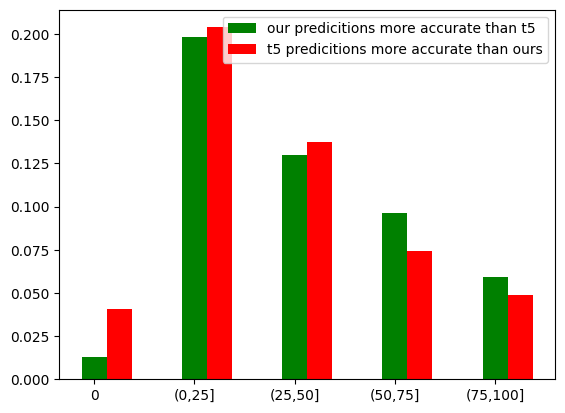

In [5]:
import matplotlib.pyplot as plt
bin = [0, 25, 50, 75]
x = [0, 1, 2, 3, 4]
better_bar = np.zeros(len(bin) + 1)
for i in range(reactions_better.shape[0]):
    if reactions_better[i,5] <= 0:
        better_bar[0] += 1
    if 0 < reactions_better[i,5] <= 25:
        better_bar[1] += 1 
    if 25 < reactions_better[i,5] <= 50:
        better_bar[2] += 1 
    if 50 < reactions_better[i,5] <= 75:
        better_bar[3] += 1 
    if reactions_better[i,5] > 75:
        better_bar[4] += 1 

worse_bar = np.zeros(len(bin) + 1)
for i in range(reactions_worse.shape[0]):
    if reactions_worse[i,5] <= 0:
        worse_bar[0] += 1
    if 0 < reactions_worse[i,5] <= 25:
        worse_bar[1] += 1 
    if 25 < reactions_worse[i,5] <= 50:
        worse_bar[2] += 1 
    if 50 < reactions_worse[i,5] <= 75:
        worse_bar[3] += 1 
    if reactions_worse[i,5] > 75:
        worse_bar[4] += 1  

for i in range(len(bin) + 1):
    plt.bar(x[i], better_bar[i]/N, width = 0.25, color = 'green', label='our predicitions more accurate')
    plt.bar(x[i] + 0.25, worse_bar[i]/N, width = 0.25, color = 'red', label='our predicitions less accurate')
plt.legend(['our predicitions more accurate than t5', 't5 predicitions more accurate than ours'])
plt.xticks(x, ['0', '(0,25]', '(25,50]', '(50,75]', '(75,100]'])


## reactants analysis

['Brc1ccccn1.Nc1ccc(C)cc1' 'Brc1cccnc1.Nc1ccc(C)cc1'
 'CCc1ccc(Br)cc1.Nc1ccc(C)cc1' 'CCc1ccc(Cl)cc1.Nc1ccc(C)cc1'
 'CCc1ccc(I)cc1.Nc1ccc(C)cc1' 'COc1ccc(Br)cc1.Nc1ccc(C)cc1'
 'COc1ccc(Cl)cc1.Nc1ccc(C)cc1' 'COc1ccc(I)cc1.Nc1ccc(C)cc1'
 'Clc1ccccn1.Nc1ccc(C)cc1' 'Clc1cccnc1.Nc1ccc(C)cc1'
 'FC(F)(F)c1ccc(Br)cc1.Nc1ccc(C)cc1' 'FC(F)(F)c1ccc(Cl)cc1.Nc1ccc(C)cc1'
 'FC(F)(F)c1ccc(I)cc1.Nc1ccc(C)cc1' 'Ic1ccccn1.Nc1ccc(C)cc1'
 'Ic1cccnc1.Nc1ccc(C)cc1']
[ 1.25  2.25  3.25  4.25  5.25  6.25  7.25  8.25  9.25 10.25 11.25 12.25
 13.25 14.25 15.25]
[3.66174054 5.32622957 2.61363935 1.78915691 3.3850553  2.53136992
 0.87327045 3.52993393 4.20624018 4.07642984 3.78713179 3.36773753
 2.67294383 3.92146826 3.78492045]
[3.65756728 4.86711032 3.13098639 1.5788002  3.09282008 3.2164293
 0.40979336 3.49337005 3.23118549 3.39266971 3.43917105 3.33498154
 2.66884161 4.22532306 4.36324837]


Text(0.5, 1.0, 'reactants')

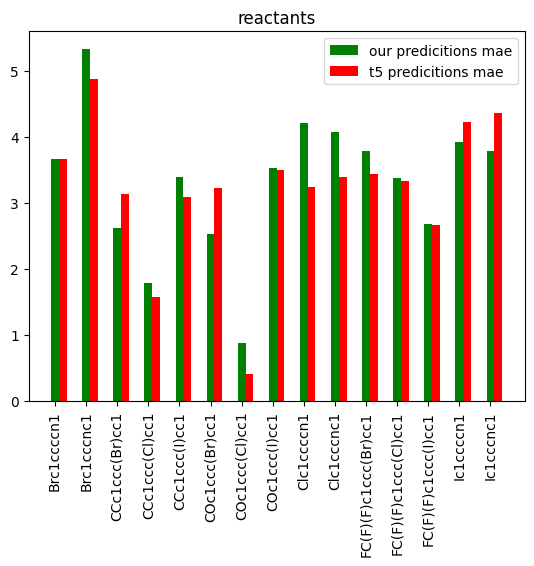

In [111]:
unique_reactants = np.unique(reactions[:,1])
print(unique_reactants)
x_label = [i.split('.')[0] for i in unique_reactants]
x = np.arange(len(unique_reactants)) + 1.25
print(x)
our_bar = np.zeros(len(unique_reactants))
t5_bar = np.zeros(len(unique_reactants))
for i in range(len(unique_reactants)):
    index = np.where(reactions[:,1] == unique_reactants[i])[0]
    our_bar[i] = np.mean(ourabs_err[index])
    t5_bar[i] = np.mean(t5abs_err[index]) 
print(our_bar)
print(t5_bar)

for i in range(len(unique_reactants)):
    plt.bar(x[i], our_bar[i], width = 0.25, color = 'green', label='our predicitions mae')
    plt.bar(x[i] + 0.25, t5_bar[i], width = 0.25, color = 'red', label='t5 predicitions mae')
plt.legend(['our predicitions mae', 't5 predicitions mae'])
plt.xticks(x, x_label, rotation=90)
plt.title('reactants') 



## product analysis

['CCc1ccc(Nc2ccc(C)cc2)cc1' 'COc1ccc(Nc2ccc(C)cc2)cc1'
 'Cc1ccc(Nc2ccc(C(F)(F)F)cc2)cc1' 'Cc1ccc(Nc2ccccn2)cc1'
 'Cc1ccc(Nc2cccnc2)cc1']
[1.25 2.25 3.25 4.25 5.25]
[2.58194828 2.37742949 3.2807653  3.92279553 4.44911718]
[2.57877228 2.43108369 3.15437069 3.72512167 4.22058886]


Text(0.5, 1.0, 'products')

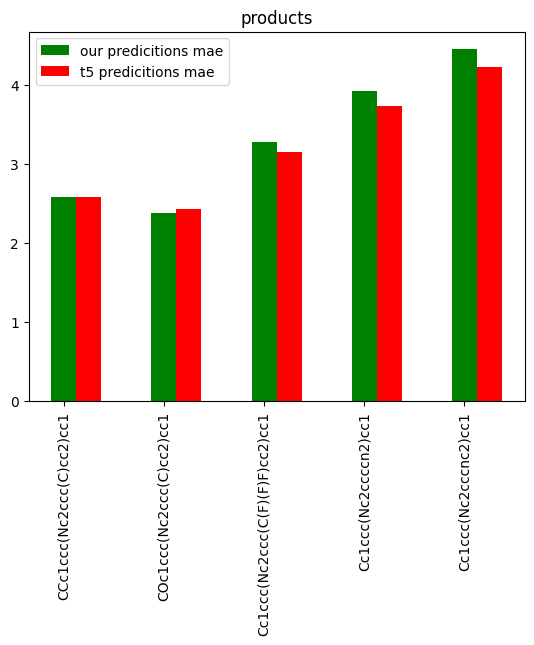

In [112]:
unique_reactants = np.unique(reactions[:,4])
print(unique_reactants)
x_label = [i.split('.')[0] for i in unique_reactants]
x = np.arange(len(unique_reactants)) + 1.25
print(x)
our_bar = np.zeros(len(unique_reactants))
t5_bar = np.zeros(len(unique_reactants))
for i in range(len(unique_reactants)):
    index = np.where(reactions[:,4] == unique_reactants[i])[0]
    our_bar[i] = np.mean(ourabs_err[index])
    t5_bar[i] = np.mean(t5abs_err[index]) 
print(our_bar)
print(t5_bar)

for i in range(len(unique_reactants)):
    plt.bar(x[i], our_bar[i], width = 0.25, color = 'green', label='our predicitions mae')
    plt.bar(x[i] + 0.25, t5_bar[i], width = 0.25, color = 'red', label='t5 predicitions mae')
plt.legend(['our predicitions mae', 't5 predicitions mae'])
plt.xticks(x, x_label, rotation=90)
plt.title('products') 

## ligand, base, additives analysis

[1.25 2.25 3.25]
[2.8544929  3.50560355 3.62611127]
[2.89857569 3.38050692 3.40400928]


Text(0.5, 1.0, 'bases')

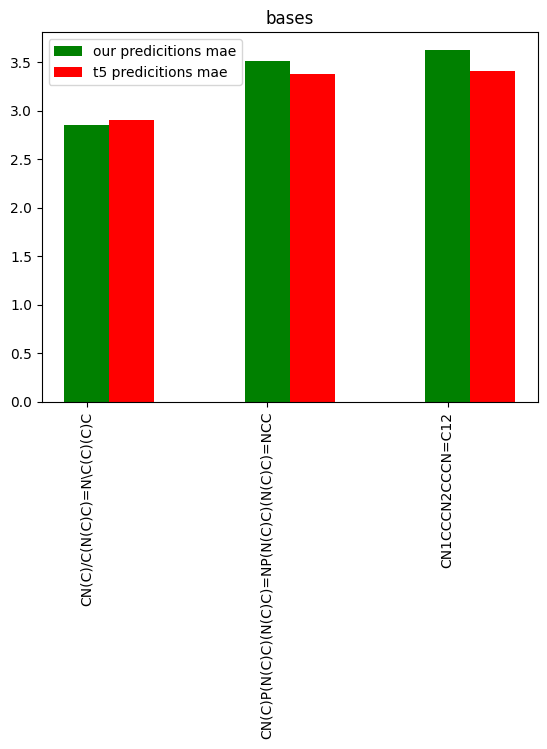

In [114]:
bases = np.unique(np.array([i.split('.')[1] for i in reactions[:,2]]))
reactions_bases = np.array([i.split('.')[1] for i in reactions[:,2]])

x_label = bases
x = np.arange(len(bases)) + 1.25
print(x)
our_bar = np.zeros(len(bases))
t5_bar = np.zeros(len(bases))
for i in range(len(bases)):
    index = np.where(reactions_bases == bases[i])[0]
    our_bar[i] = np.mean(ourabs_err[index])
    t5_bar[i] = np.mean(t5abs_err[index]) 
print(our_bar)
print(t5_bar)

for i in range(len(bases)):
    plt.bar(x[i], our_bar[i], width = 0.25, color = 'green', label='our predicitions mae')
    plt.bar(x[i] + 0.25, t5_bar[i], width = 0.25, color = 'red', label='t5 predicitions mae')
plt.legend(['our predicitions mae', 't5 predicitions mae'])
plt.xticks(x, x_label, rotation=90)
plt.title('reactants') 
plt.title('bases')

[1.25 2.25 3.25 4.25]
[3.75542545 3.3263588  3.12530088 3.08817315]
[3.368263   3.45673091 3.08582585 2.99788909]


Text(0.5, 1.0, 'ligands')

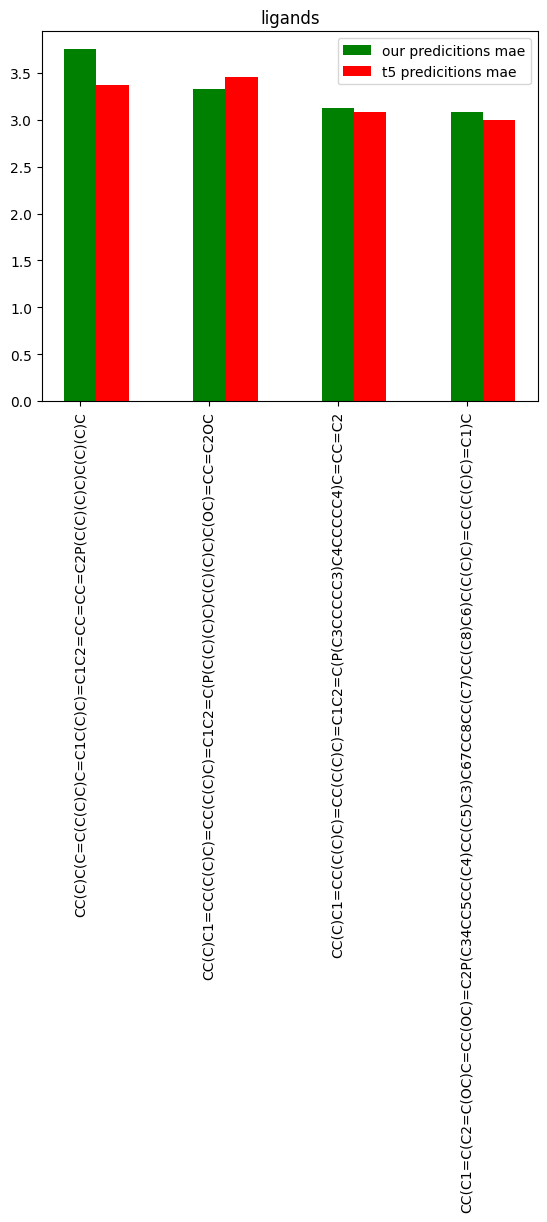

In [115]:
bases = np.unique(np.array([i.split('.')[0] for i in reactions[:,2]]))
reactions_bases = np.array([i.split('.')[0] for i in reactions[:,2]])

x_label = bases
x = np.arange(len(bases)) + 1.25
print(x)
our_bar = np.zeros(len(bases))
t5_bar = np.zeros(len(bases))
for i in range(len(bases)):
    index = np.where(reactions_bases == bases[i])[0]
    our_bar[i] = np.mean(ourabs_err[index])
    t5_bar[i] = np.mean(t5abs_err[index]) 
print(our_bar)
print(t5_bar)

for i in range(len(bases)):
    plt.bar(x[i], our_bar[i], width = 0.25, color = 'green', label='our predicitions mae')
    plt.bar(x[i] + 0.25, t5_bar[i], width = 0.25, color = 'red', label='t5 predicitions mae')
plt.legend(['our predicitions mae', 't5 predicitions mae'])
plt.xticks(x, x_label, rotation=90)
plt.title('reactants') 
plt.title('ligands')

[ 1.25  3.25  5.25  7.25  9.25 11.25 13.25 15.25 17.25 19.25 21.25 23.25
 25.25 27.25 29.25 31.25 33.25 35.25 37.25 39.25 41.25 43.25]
[4.60033321 4.82026768 2.91672039 2.56140256 3.57837892 1.53127408
 3.39567494 3.14183283 2.84561586 2.8063333  3.07378197 2.49782968
 3.63601685 3.28432846 2.27025557 3.24449372 2.58954263 4.62031603
 3.85479856 4.32177114 3.81544638 3.51642275]
[3.89658813 4.01459701 3.09249589 2.58364744 3.73637433 1.60217629
 3.37604286 2.94169812 3.34138469 2.50611825 2.59991957 3.02755865
 3.80797915 3.50568375 2.66380462 3.42780716 2.73944097 4.96044135
 2.62941738 3.75738155 2.69884396 3.87116755]


Text(0.5, 1.0, 'additives')

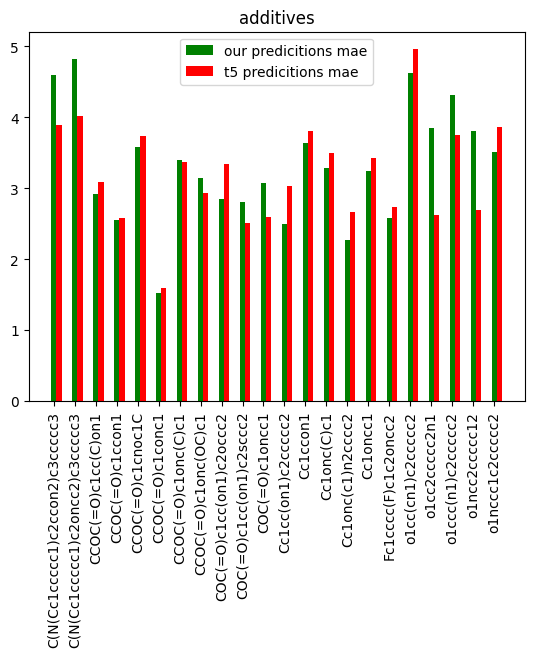

In [123]:
bases = np.unique(np.array([i.split('.')[2] for i in reactions[:,2]]))
reactions_bases = np.array([i.split('.')[2] for i in reactions[:,2]])

x_label = bases
x = np.arange(len(bases))*2 + 1.25
print(x)
our_bar = np.zeros(len(bases))
t5_bar = np.zeros(len(bases))
for i in range(len(bases)):
    index = np.where(reactions_bases == bases[i])[0]
    our_bar[i] = np.mean(ourabs_err[index])
    t5_bar[i] = np.mean(t5abs_err[index]) 
print(our_bar)
print(t5_bar)

for i in range(len(bases)):
    plt.bar(x[i], our_bar[i], width = 0.5, color = 'green', label='our predicitions mae')
    plt.bar(x[i] + 0.5, t5_bar[i], width = 0.5, color = 'red', label='t5 predicitions mae')
plt.legend(['our predicitions mae', 't5 predicitions mae'])
plt.xticks(x, x_label, rotation=90)
plt.title('reactants') 
plt.title('additives')


## Molecule complexity analysis

In [80]:
## https://github.com/AstraZeneca/molecular-complexity/tree/main
"""
This is the code to calculate the CM, CM_star and Cse metrics.
"""
from collections import Counter
from typing import Dict, Iterator, List, NamedTuple, Tuple

import numpy as np
from rdkit import Chem

# Atom types are defined as (symbol, total degree, non-h degree)
AtomType = Tuple[str, int, int]
# Atoms are defined as (atom index, atom type)
Atom = Tuple[int, AtomType]
AtomDict = Dict[Atom, List[Atom]]


class MolecularComplexity(NamedTuple):
    cm: float
    cm_star: float
    cse: float


def _non_h_items(data: Dict[Atom, any]) -> Iterator[Tuple[Atom, any]]:
    """
    Generator for non-H items from a dictionary where the keys are atom tuples.
    """
    for key, val in data.items():
        if key[1][0] != "H":
            yield key, val


def _collect_atom_paths(neighbors: AtomDict) -> List[List[tuple]]:
    """
    Returns list of atom paths for each atom.

    An atom path is a tuple of atom types.
    """
    atom_paths = []
    for atom, nbs in _non_h_items(neighbors):
        paths = []
        for nb in nbs:
            if nb[1][0] == "H" or neighbors[nb] == [atom]:
                # No second neighbors
                paths.append((atom[1], nb[1]))
            else:
                paths.extend(
                    (atom[1], nb[1], nb2[1]) for nb2 in neighbors[nb] if nb2 != atom
                )

        atom_paths.append(paths)

    return atom_paths


def get_atom_type(atom: Chem.rdchem.Mol) -> AtomType:
    """
    Return a tuple describing the atom type.

    Considers element, total number of connections, and number of non-H connections.
    """
    symbol = atom.GetSymbol()
    degree = atom.GetTotalDegree()
    h_count = atom.GetTotalNumHs(includeNeighbors=True)
    non_h = degree - h_count
    return (symbol, degree, non_h)


def fractional_occurrence(data: list) -> np.ndarray:
    """
    Calculate the fractional occurrence of unique items in the input data.

    Uniqueness determined by collections.Counter.

    Returns:
        np.ndarray: fractional occurrence of unique items
    """
    counter = Counter(data)
    counts = np.array(list(counter.values()))
    return counts / len(data)


def calculate_molecular_complexity(mol: Chem.rdchem.Mol) -> MolecularComplexity:
    """
    This is a function to calculate the molecular complexity metrics described in
    Proudfoot, Bioorganic & Medicinal Chemistry Letters 27 (2017) 2014-2017.
    https://doi.org/10.1016/j.bmcl.2017.03.008

    This function takes an RDKit Mol object, enumerates atom paths,
    and then calculates the complexity environment for each atom CA as

    CA = - Sum (pi*log2(pi)) + log2(N)

    where pi is the fractional occurrence of each path type emanating from
    an atom and N is the total number of paths emanating from that atom.

    Molecular complexity CM can be defined as either the simple sum of the CA,
    or CM* which is the log-sum of the exponentials of the CA.

    CM = Sum (CA)

    CM* = log2(Sum (2**CA))

    Cse = - Sum (qi*log2(qi))

    where qi is the fractional occurrence of an atom environment.
    """
    # get atom types for each atom in the molecule
    atoms = [(atom.GetIdx(), get_atom_type(atom)) for atom in mol.GetAtoms()]

    # create dict with neighbors of each atom
    neighbors = {
        atom: [
            atoms[neighbor.GetIdx()]
            for neighbor in mol.GetAtomWithIdx(atom[0]).GetNeighbors()
        ]
        for atom in atoms
    }

    atom_paths = _collect_atom_paths(neighbors)

    cas = np.zeros(len(atom_paths))
    for i, paths in enumerate(atom_paths):
        total_paths = len(paths)
        pi = fractional_occurrence(paths)
        cas[i] = -np.sum(pi * np.log2(pi)) + np.log2(total_paths)

    cm = np.sum(cas)

    cm_star = np.log2(np.sum(2**cas))

    # sort and concatenate the individual paths to compare the atom environments
    atom_environments = [tuple(sorted(paths)) for paths in atom_paths]

    # Now we can calculate the Cse metric as the fractional occurrence of each atom environment
    qi = fractional_occurrence(atom_environments)
    cse = -np.sum(qi * np.log2(qi))

    #return MolecularComplexity(cm, cm_star, cse)
    return cm


def molecular_complexity(smiles: str) -> MolecularComplexity:
    """This function takes SMILES and returns the CM, CM*, and Cse metrics"""
    try:
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        return calculate_molecular_complexity(mol)
    except Exception:
        return MolecularComplexity(np.nan, np.nan, np.nan)

In [82]:
r_complexity = []
a_complexity = []
p_complexity = []
t_complexity = []
for i in range(reactions.shape[0]):
    r_i = reactions[i,1]
    a_i = reactions[i,2]
    p_i = reactions[i,4]
    r_complexity.append(molecular_complexity(r_i))
    a_complexity.append(molecular_complexity(a_i))
    p_complexity.append(molecular_complexity(p_i))
    t_complexity.append(molecular_complexity(r_i) + molecular_complexity(a_i) + molecular_complexity(p_i))

In [93]:
print(np.min(t_complexity))
print(np.max(t_complexity))
print(np.min(r_complexity))
print(np.max(r_complexity))
print(np.min(a_complexity))
print(np.max(a_complexity))

317.53877457868475
516.9913196262229
59.033808648727835
71.98818635146668
199.50123227978676
376.98030783307706


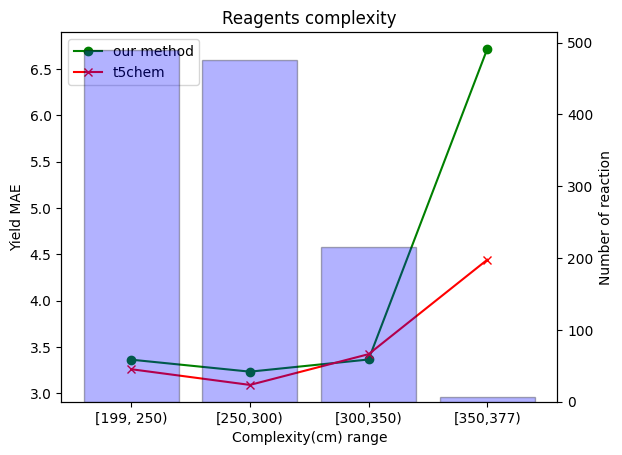

In [96]:
amount_range = np.array([[199, 250], [250, 300], [300, 350], [350, 400]])
d = amount_range.shape[0]
our_grid_mae = np.zeros((d,1))
t5_grid_mae = np.zeros((d,1))
amount = np.zeros((d,1))
x = np.arange(d)
for i in range(d):
    index1 = np.where(a_complexity>amount_range[i][0])[0]
    index2 = np.where(a_complexity<=amount_range[i][1])[0]    
    intersect_index = list(set(index1) & set(index2))
    our_grid_mae[i][0] = np.mean(ourabs_err[intersect_index])
    t5_grid_mae[i][0] = np.mean(t5abs_err[intersect_index]) 
    amount[i][0] = len(intersect_index)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(d):
    ax2.bar(x[i], amount[i], color='b', edgecolor='black', alpha=0.3)
ax2.set_ylabel('Number of reaction')


ax1.plot(x, our_grid_mae, color = 'green', marker = 'o', label='our predictions mae')
ax1.plot(x, t5_grid_mae, color = 'red', marker = 'x', label='t5 predicitions mae')
ax1.set_xticks(x, ['[199, 250)', '[250,300)', '[300,350)', '[350,377)'], fontsize=10)
ax1.set_xlabel('Complexity(cm) range')
ax1.set_ylabel('Yield MAE')
plt.title('Reagents complexity')
ax1.legend(['our method', 't5chem'])

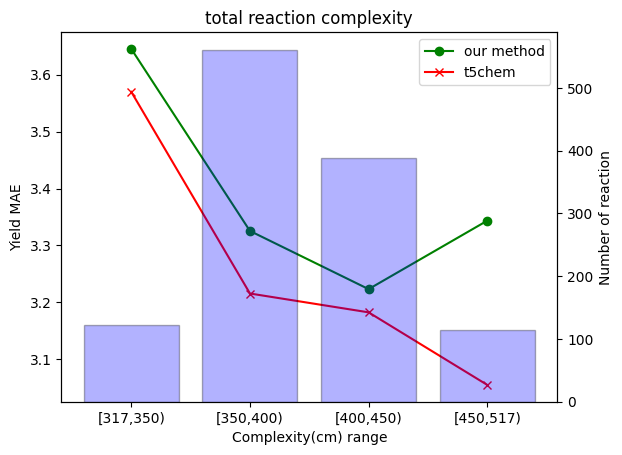

In [97]:
amount_range = np.array([[300, 350], [350, 400], [400, 450], [450, 520]])
d = amount_range.shape[0]
our_grid_mae = np.zeros((d,1))
t5_grid_mae = np.zeros((d,1))
amount = np.zeros((d,1))
x = np.arange(d)
for i in range(d):
    index1 = np.where(t_complexity>amount_range[i][0])[0]
    index2 = np.where(t_complexity<=amount_range[i][1])[0]    
    intersect_index = list(set(index1) & set(index2))
    our_grid_mae[i][0] = np.mean(ourabs_err[intersect_index])
    t5_grid_mae[i][0] = np.mean(t5abs_err[intersect_index]) 
    amount[i][0] = len(intersect_index)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(d):
    ax2.bar(x[i], amount[i], color='b', edgecolor='black', alpha=0.3)
ax2.set_ylabel('Number of reaction')


ax1.plot(x, our_grid_mae, color = 'green', marker = 'o', label='our predictions mae')
ax1.plot(x, t5_grid_mae, color = 'red', marker = 'x', label='t5 predicitions mae')
ax1.set_xticks(x, ['[317,350)', '[350,400)', '[400,450)', '[450,517)'], fontsize=10)
ax1.set_xlabel('Complexity(cm) range')
ax1.set_ylabel('Yield MAE')
plt.title('total reaction complexity')
ax1.legend(['our method', 't5chem'])

## atoms number analysis

In [33]:
from rdkit import Chem
def atom_num_cal(userInput): 
    m = Chem.MolFromSmiles(userInput)
    atomic_count = 0
    for atom in m.GetAtoms():
        atomic_count += 1
    return atomic_count

r_atom_amount = []
a_atom_amount = []
p_atom_amount = []
for i in range(reactions.shape[0]):
    r_i = reactions[i,1]
    a_i = reactions[i,2]
    p_i = reactions[i,4]
    r_atom_amount.append(atom_num_cal(r_i))
    a_atom_amount.append(atom_num_cal(a_i))
    p_atom_amount.append(atom_num_cal(p_i))

r_atom_amount = np.array(r_atom_amount)
a_atom_amount = np.array(a_atom_amount)
p_atom_amount = np.array(p_atom_amount)

t_atom_amount = r_atom_amount + a_atom_amount + p_atom_amount
print(np.unique(t_atom_amount))

[ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 120]


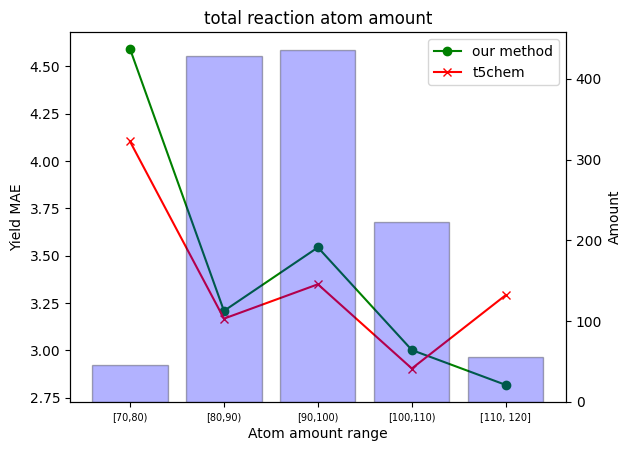

In [40]:
amount_range = np.array([[70, 80], [80, 90], [90, 100], [100, 110], [110, 120]])
d = amount_range.shape[0]
our_grid_mae = np.zeros((d,1))
t5_grid_mae = np.zeros((d,1))
amount = np.zeros((d,1))
x = np.arange(d)
for i in range(d):
    index1 = np.where(t_atom_amount>amount_range[i][0])[0]
    index2 = np.where(t_atom_amount<=amount_range[i][1])[0]    
    intersect_index = list(set(index1) & set(index2))
    our_grid_mae[i][0] = np.mean(ourabs_err[intersect_index])
    t5_grid_mae[i][0] = np.mean(t5abs_err[intersect_index]) 
    amount[i][0] = len(intersect_index)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(d):
    ax2.bar(x[i], amount[i], color='b', edgecolor='black', alpha=0.3)
ax2.set_ylabel('Amount')


ax1.plot(x, our_grid_mae, color = 'green', marker = 'o', label='our predictions mae')
ax1.plot(x, t5_grid_mae, color = 'red', marker = 'x', label='t5 predicitions mae')
ax1.set_xticks(x, ['[70,80)', '[80,90)', '[90,100)', '[100,110)', '[110, 120]'], fontsize=7)
ax1.set_xlabel('Atom amount range')
ax1.set_ylabel('Yield MAE')
plt.title('total reaction atom amount')
ax1.legend(['our method', 't5chem'])

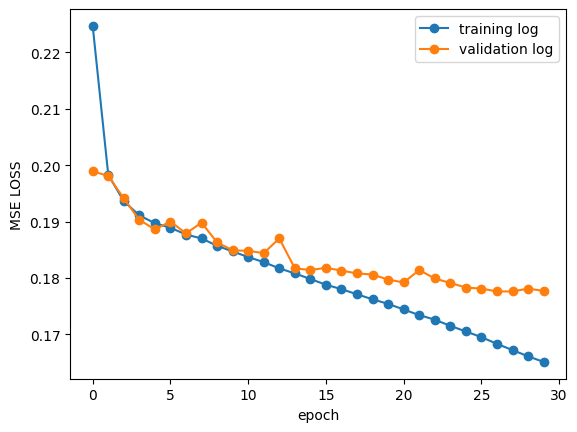

In [4]:
import numpy as np
import matplotlib.pyplot as plt
train_mae = [0.2855, 0.2124, 0.2046, 0.1985, 0.1946, 0.1936, 0.1921, 0.1917, 0.1907, 0.1901,
             0.1894, 0.1887, 0.1885, 0.1878, 0.1875, 0.1872, 0.1869, 0.1862, 0.1860, 0.1851,
             0.1850, 0.1843, 0.1833, 0.1831, 0.1826, 0.1819, 0.1812, 0.1806, 0.1797, 0.1792,
             0.178, 0.1776, 0.1765, 0.1761, 0.1753, 0.1744, 0.1736, 0.1727, 0.1722, 0.1715,
             0.1703, 0.1699, 0.1693, 0.1684, 0.1672, 0.1664, 0.1659, 0.1646, 0.1640, 0.1633]

train_loss_array = [0.2247, 0.1983, 0.1936, 0.1911, 0.1897, 0.1889, 0.1877, 0.1870, 0.1857, 0.1847, 
                    0.1837, 0.1828, 0.1817, 0.1808, 0.1798, 0.1788, 0.1780, 0.1771, 0.1762, 0.1754, 
                    0.1744, 0.1734, 0.1726, 0.1715, 0.1705, 0.1695, 0.1683, 0.1672, 0.1661, 0.1651]

valid_loss_array = [0.1989, 0.1981, 0.1941, 0.1903, 0.1886, 0.1900, 0.1879, 0.1898, 0.1863, 0.1849,
                    0.1848, 0.1844, 0.1870, 0.1817, 0.1814, 0.1818, 0.1813, 0.1808, 0.1806, 0.1797,
                    0.1792, 0.1814, 0.1799, 0.1791, 0.1783, 0.1781, 0.1776, 0.1776, 0.1781, 0.1777]



x = np.arange(len(train_loss_array))
plt.plot(x, train_loss_array, marker='o')
plt.plot(x, valid_loss_array, marker='o')
plt.xlabel('epoch')
plt.ylabel('MSE LOSS')
plt.legend(['training log', 'validation log'])

